Max Flow: 6 
[2.1457672119140625e-05, 3.2901763916015625e-05, 4.458427429199219e-05]


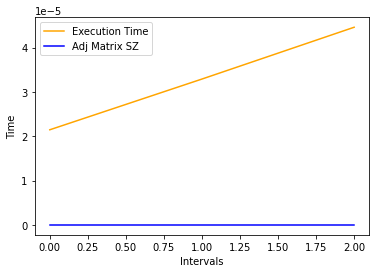

In [35]:
#Ford Fulkersons Algorithm to Calculate Maximum Flow 

import time 
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import defaultdict

times = []

class Graph:

    def __init__(self, graph):
        self.graph = graph
        self. ROW = len(graph)


    # Using BFS as a searching algorithm 
    def searching_algo_BFS(self, s, t, parent):

        visited = [False] * (self.ROW)
        queue = []

        queue.append(s)
        visited[s] = True

        while queue:

            u = queue.pop(0)

            for ind, val in enumerate(self.graph[u]):
                if visited[ind] == False and val > 0:
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u

        return True if visited[t] else False

    # Applying fordfulkerson algorithm
    def ford_fulkerson(self, source, sink):
        parent = [-1] * (self.ROW)
        max_flow = 0
        start = time.time()
        while self.searching_algo_BFS(source, sink, parent):

            path_flow = float("Inf")
            s = sink
            while(s != source):
                path_flow = min(path_flow, self.graph[parent[s]][s])
                s = parent[s]

            # Adding the path flows
            max_flow += path_flow

            # Updating the residual values of edges
            v = sink
            while(v != source):
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]
            elapsed_time = time.time() - start
            times.append(elapsed_time)
        
        return max_flow

execution_time = [0,0,0]

graph = [[0, 8, 0, 0, 3, 0],
         [0, 0, 9, 0, 0, 0],
         [0, 0, 0, 0, 7, 2],
         [0, 0, 0, 0, 0, 5],
         [0, 0, 7, 4, 0, 0],
         [0, 0, 0, 0, 0, 0]]

g = Graph(graph)

source = 0
sink = 5

print("Max Flow: %d " % g.ford_fulkerson(source, sink))

print(times)
plt.plot()
plt.plot(times, label = 'Execution Time', color = 'orange')
plt.plot(execution_time, label = 'Adj Matrix SZ', color = 'blue')
plt.xlabel("Intervals")
plt.ylabel("Time")
plt.legend()
plt.show()